# Markov Chain Monte Carlo

In [1]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from scipy import stats

warnings.simplefilter(action="ignore", category=FutureWarning)
pd.set_option("mode.chained_assignment", None)

In [2]:
%config Inline.figure_format = 'retina'
az.style.use("arviz-darkgrid")
az.rcParams["stats.credible_interval"] = 0.89  # sets default credible interval used by arviz

## A simple markov chain

This example is taken from the book, where 'king markov' needs to move around his archipeligo kingdom (consisting of 10 islands) - visiting each island in proportion to its population. The problem is that king markov isn't very good at record keeping, and doesn't know the population of all the islands in advance in order to plan his trip

In [24]:
num_weeks = int(1000)
positions = np.zeros(num_weeks)
current = 10
island_populations = [1,2,3,4,5,6,7,8,9,10]

for i in range(num_weeks):

    # record current position
    positions[i] = current
    # record current population
    curr_population = island_populations[current-1]
    
    
    # flip coin to generate proposal
    proposal = current + np.random.choice([-1, 1])
    
    
    # loop around the archipelago
    if proposal < 1:
        proposal = 10
    if proposal > 10:
        proposal = 1
        
    # check out the population of the proposed island
    prop_population = island_populations[proposal-1]
    # move?
    prob_move = prop_population / curr_population
    
    if np.random.uniform() < prob_move:
        current = proposal

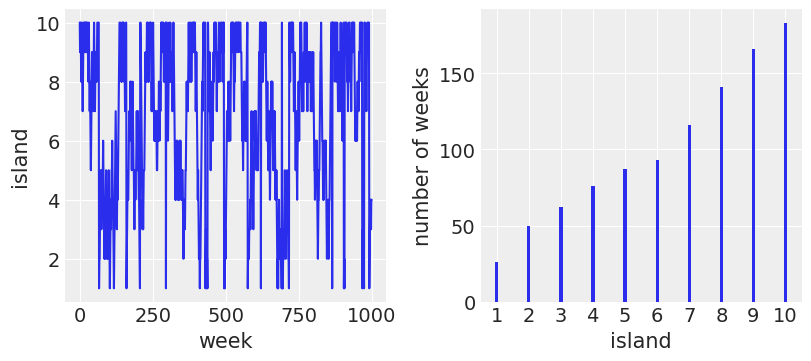

In [25]:
# Figure 9.2
_, axs = plt.subplots(1, 2, figsize=[8, 3.5], constrained_layout=True)

ax0, ax1 = axs

nplot = 100
ax0.plot(positions)
ax0.set_ylabel("island")
ax0.set_xlabel("week")

counts, _ = np.histogram(positions, bins=10)
ax1.bar(range(10), counts, width=0.1)
ax1.set_ylabel("number of weeks")
ax1.set_xlabel("island")
ax1.set_xticks(range(10))
ax1.set_xticklabels(range(1, 11));